In [5]:
import sqlite3

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

In [11]:
connection = sqlite3.connect("Online_Retail.db")

In [12]:
cursor = connection.cursor()

In [7]:
query = "SELECT * FROM Online_Retail"

In [8]:
cursor.execute(query)

In [9]:
results = cursor.fetchall()

In [10]:
for row in results:
    print(row)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



(564825, '23295', 'SET OF 12 MINI LOAF BAKING CASES', 2, '08/30/11', 2.46, '', 'United Kingdom')
(564825, '23306', 'SET OF 36 DOILIES PANTRY DESIGN', 1, '08/30/11', 2.92, '', 'United Kingdom')
(564825, '23321', 'SMALL WHITE HEART OF WICKER', 1, '08/30/11', 3.29, '', 'United Kingdom')
(564825, '23323', 'WHITE WICKER STAR ', 1, '08/30/11', 4.13, '', 'United Kingdom')
(564825, '23327', 'HANGING CLEAR MINI BOTTLE', 10, '08/30/11', 1.63, '', 'United Kingdom')
(564825, '23328', 'SET 6 SCHOOL MILK BOTTLES IN CRATE', 1, '08/30/11', 7.46, '', 'United Kingdom')
(564825, '23330', 'DECORATIVE WICKER HEART MEDIUM', 3, '08/30/11', 2.46, '', 'United Kingdom')
(564825, '23331', 'DECORATIVE WICKER HEART SMALL', 3, '08/30/11', 1.25, '', 'United Kingdom')
(564825, '23343', 'JUMBO BAG VINTAGE CHRISTMAS ', 4, '08/30/11', 4.13, '', 'United Kingdom')
(564825, '23360', 'SET 8 CANDLES VINTAGE DOILY', 1, '08/30/11', 4.13, '', 'United Kingdom')
(564825, '35637A', 'IVORY STRING CURTAIN WITH POLE ', 1, '08/30/11',

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [9]:
query1 = "SELECT Customer_ID, SUM(Quantity * Unit_Price) AS total_purchase_amount FROM Online_Retail WHERE (Customer_ID != '' AND Customer_ID IS NOT NULL) GROUP BY Customer_ID ORDER BY total_purchase_amount DESC LIMIT 10"

In [13]:
cursor.execute(query1)

In [14]:
results1 = cursor.fetchall()

In [15]:
df1 = pd.DataFrame(results1, columns=['Customer_ID', 'Total_Purchase_Amount'])

In [16]:
print(df1)

   Customer_ID  Total_Purchase_Amount
0        14646              279489.02
1        18102              256438.49
2        17450              187482.17
3        14911              132572.62
4        12415              123725.45
5        14156              113384.14
6        17511               88125.38
7        16684               65892.08
8        13694               62653.10
9        15311               59419.34


In [26]:
####Visualization for the Analysis####

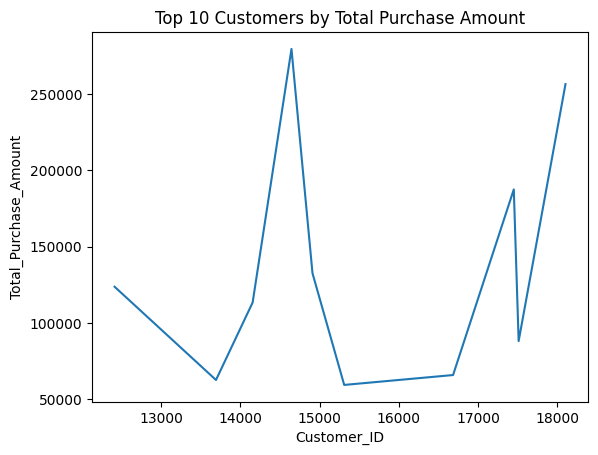

<Figure size 640x480 with 0 Axes>

In [40]:
sns.lineplot(y=df1['Total_Purchase_Amount'], x=df1['Customer_ID'], data=df1)
plt.title('Top 10 Customers by Total Purchase Amount')
plt.show()
plt.savefig('line_plot_Q1.png')

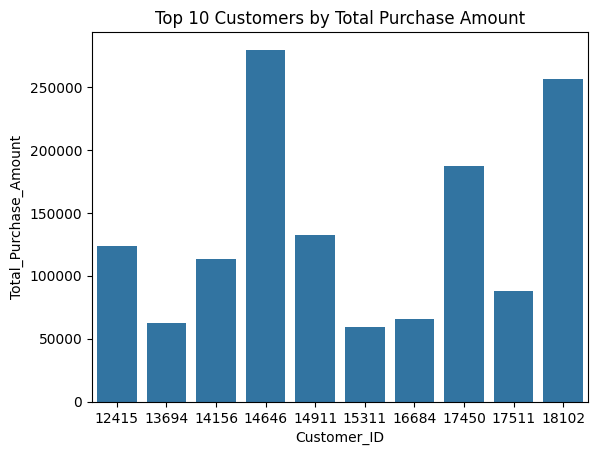

<Figure size 640x480 with 0 Axes>

In [41]:
sns.barplot(y=df1['Total_Purchase_Amount'], x=df1['Customer_ID'], data=df1)
plt.title('Top 10 Customers by Total Purchase Amount')
plt.show()
plt.savefig('Bar_Plot_Q1.png')

In [35]:
Customer_ID = df1['Customer_ID']
Total_Purchase_Amount = df1['Total_Purchase_Amount']

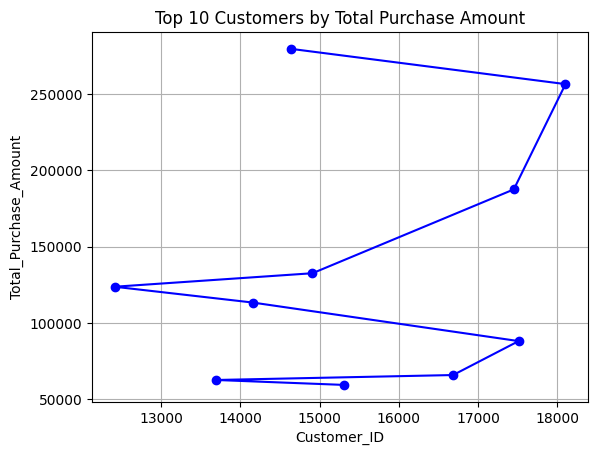

<Figure size 640x480 with 0 Axes>

In [42]:
plt.plot(Customer_ID,Total_Purchase_Amount, marker='o', linestyle='-', color='blue')
plt.xlabel('Customer_ID')
plt.ylabel('Total_Purchase_Amount')
plt.title('Top 10 Customers by Total Purchase Amount')
plt.grid(True)
plt.show()
plt.savefig('Line_chart_with_Grid_Q1.png')

In [ ]:
####Query 2######

In [70]:
query2 = "SELECT Description, COUNT(Invoice_No) AS order_count FROM Online_Retail WHERE Description != ''GROUP BY Description ORDER BY order_count DESC LIMIT 5"

In [71]:
cursor.execute(query2)

In [72]:
results2 = cursor.fetchall()

In [73]:
df2 = pd.DataFrame(results2, columns=['Product_Name', 'Number_of_Orders'])

In [74]:
print(df2)

                         Product_Name  Number_of_Orders
0  WHITE HANGING HEART T-LIGHT HOLDER              2369
1            REGENCY CAKESTAND 3 TIER              2200
2             JUMBO BAG RED RETROSPOT              2159
3                       PARTY BUNTING              1727
4             LUNCH BAG RED RETROSPOT              1638


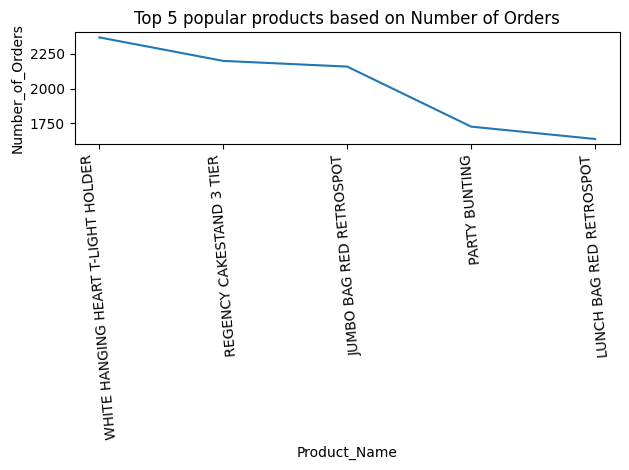

<Figure size 640x480 with 0 Axes>

In [90]:
sns.lineplot(y=df2['Number_of_Orders'], x=df2['Product_Name'], data=df2)
plt.title('Top 5 popular products based on Number of Orders')
##plt.figure(figsize=(10, 5))
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()
plt.savefig('line_plot_Q2.png')

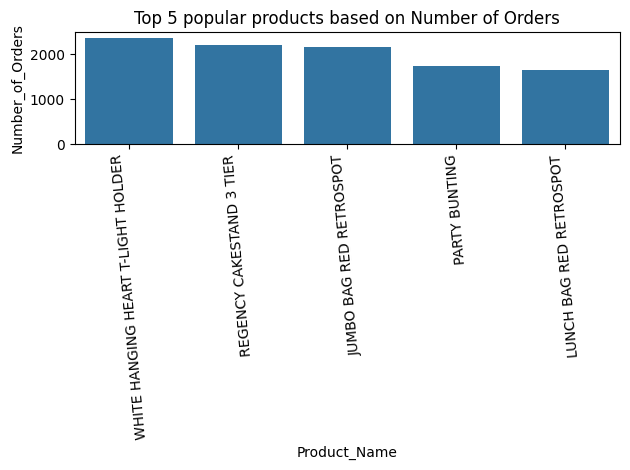

<Figure size 640x480 with 0 Axes>

In [89]:
sns.barplot(y=df2['Number_of_Orders'], x=df2['Product_Name'], data=df2)
plt.title('Top 5 popular products based on Number of Orders')
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()
plt.savefig('Bar_Plot_Q2.png')

In [83]:
Product_Name = df2['Product_Name']
Number_of_Orders = df2['Number_of_Orders']

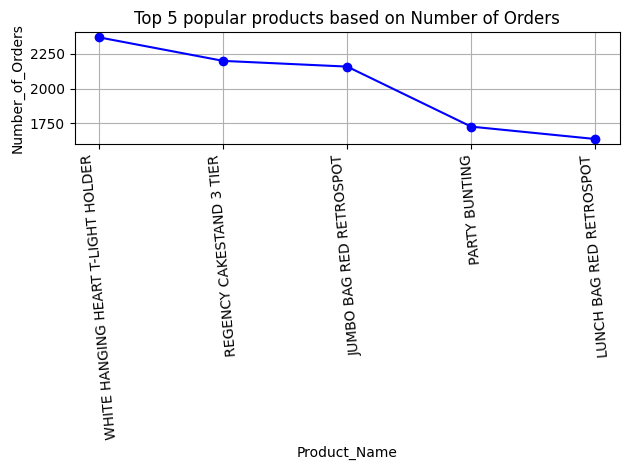

<Figure size 640x480 with 0 Axes>

In [88]:
plt.plot(Product_Name,Number_of_Orders, marker='o', linestyle='-', color='blue')
plt.xlabel('Product_Name')
plt.ylabel('Number_of_Orders')
plt.title('Top 5 popular products based on Number of Orders')
plt.grid(True)
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()
plt.savefig('Line_chart_with_Grid_Q2.png')

In [ ]:
####Query 3######

In [92]:
query3 = "SELECT SUBSTRING(Invoice_Date,1,2) AS Invoice_Month, SUBSTRING(Invoice_Date,7,2) AS Invoice_YEAR, SUM(Quantity * Unit_Price) AS Monthly_Revenue FROM Online_Retail GROUP BY Invoice_YEAR, Invoice_Month ORDER BY Invoice_YEAR, Invoice_Month"

In [93]:
cursor.execute(query3)

In [94]:
results3 = cursor.fetchall()

In [95]:
df3 = pd.DataFrame(results3, columns=['Month','Year', 'Monthly_Revenue'])

In [96]:
print(df3)

   Month Year  Monthly_Revenue
0     12   10       748957.020
1     01   11       560000.260
2     02   11       498062.650
3     03   11       683267.080
4     04   11       493207.121
5     05   11       723333.510
6     06   11       691123.120
7     07   11       681300.111
8     08   11       682680.510
9     09   11      1019687.622
10    10   11      1070704.670
11    11   11      1461756.250
12    12   11       433668.010


In [100]:
df3['Month_Year'] = df3['Month'] + '/' +  '20' + df3['Year']


In [106]:
df4 = df3.drop('Month/Year', axis = 1)

In [107]:
print(df4)

   Month Year  Monthly_Revenue Month_Year
0     12   10       748957.020    12/2010
1     01   11       560000.260    01/2011
2     02   11       498062.650    02/2011
3     03   11       683267.080    03/2011
4     04   11       493207.121    04/2011
5     05   11       723333.510    05/2011
6     06   11       691123.120    06/2011
7     07   11       681300.111    07/2011
8     08   11       682680.510    08/2011
9     09   11      1019687.622    09/2011
10    10   11      1070704.670    10/2011
11    11   11      1461756.250    11/2011
12    12   11       433668.010    12/2011


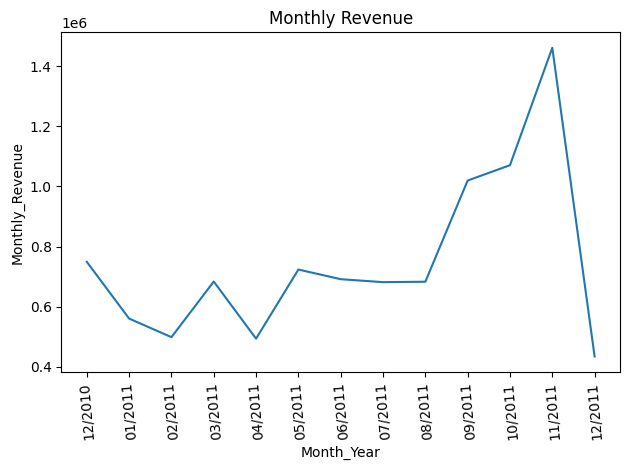

<Figure size 640x480 with 0 Axes>

In [109]:
sns.lineplot(y=df4['Monthly_Revenue'], x=df4['Month_Year'], data=df4)
plt.title('Monthly Revenue')
##plt.figure(figsize=(10, 5))
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()
plt.savefig('line_plot_Q3.png')

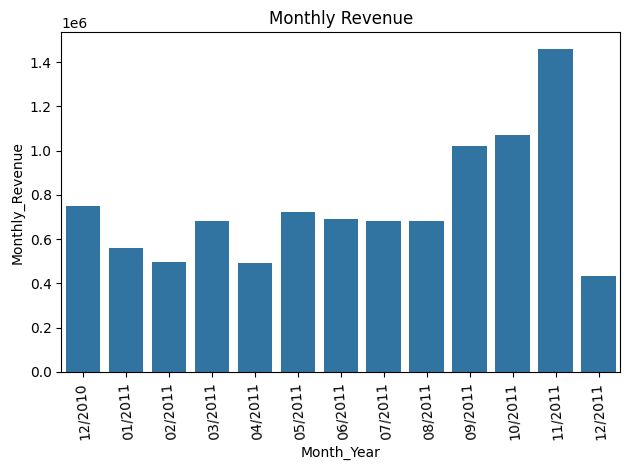

<Figure size 640x480 with 0 Axes>

In [110]:
sns.barplot(y=df4['Monthly_Revenue'], x=df4['Month_Year'], data=df4)
plt.title('Monthly Revenue')
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()
plt.savefig('Bar_Plot_Q3.png')

In [111]:
Monthly_Revenue = df4['Monthly_Revenue']
Month_Year = df4['Month_Year']

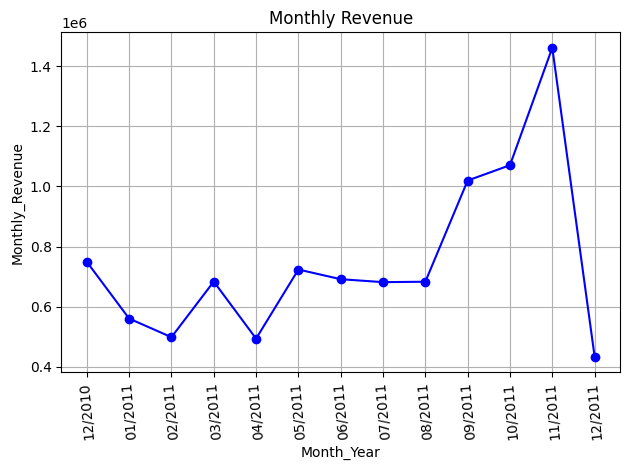

<Figure size 640x480 with 0 Axes>

In [112]:
plt.plot(Month_Year,Monthly_Revenue, marker='o', linestyle='-', color='blue')
plt.xlabel('Month_Year')
plt.ylabel('Monthly_Revenue')
plt.title('Monthly Revenue')
plt.grid(True)
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()
plt.savefig('Line_chart_with_Grid_Q3.png')